In [1]:
import os
os.chdir('../')

import warnings
warnings.filterwarnings('ignore')

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import os

!nvidia-smi
os.environ["CUDA_VISIBLE_DEVICES"]="0"

Sun Aug 20 05:17:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.199.02   Driver Version: 470.199.02   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100 80G...  Off  | 00000000:1B:00.0 Off |                    0 |
| N/A   32C    P0    64W / 300W |  21543MiB / 80994MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA A100 80G...  Off  | 00000000:1C:00.0 Off |                    0 |
| N/A   

### Hyperparams

In [3]:
n_mels = 80
n_outputs = 61
n_frames = 400

In [4]:
from model.model_glowtts_sid import Model
from utils.util import *
from tensorboardX import SummaryWriter

step = 0
device = 'cuda:0'

# Model
model = Model(in_dim=n_mels, enc_hidden_dim=256, out_dim=61, dec_hidden_dim=256, dilation_rate=2, n_layers=6)
model = model.to(device)
print('done')

done


In [6]:
!ls -lt /data/scpark/save/lips/train08.18-1/

total 9026400
-rw-rw-r-- 1 scpark scpark      9900  8월 20 05:02 events.out.tfevents.1692347811.GPUSVR11
-rw-rw-r-- 1 scpark scpark 924299143  8월 20 02:02 save_90000
-rw-rw-r-- 1 scpark scpark 924299143  8월 19 22:54 save_80000
-rw-rw-r-- 1 scpark scpark 924299143  8월 19 19:45 save_70000
-rw-rw-r-- 1 scpark scpark 924299143  8월 19 16:42 save_60000
-rw-rw-r-- 1 scpark scpark 924299143  8월 19 13:01 save_50000
-rw-rw-r-- 1 scpark scpark 924299143  8월 19 08:53 save_40000
-rw-rw-r-- 1 scpark scpark 924299143  8월 19 04:38 save_30000
-rw-rw-r-- 1 scpark scpark 924299143  8월 19 00:22 save_20000
-rw-rw-r-- 1 scpark scpark 924299143  8월 18 20:39 save_10000
-rw-rw-r-- 1 scpark scpark 924282991  8월 18 17:38 save_0


In [7]:
path = '/data/scpark/save/lips/train08.18-1/save_90000'
checkpoint = torch.load(path, map_location=torch.device('cpu'))    
model.load_state_dict(checkpoint['model_state_dict'], strict=True)
print('done')

done


In [8]:
!ls -lS /Storage/speech/tts/kaist-audio-book/wav/남1_동화1/

total 732912
-rw-r--r-- 1 guhyun guhyun 1277038  5월 11 19:49 141.spec.pt
-rwxrwxrwx 1 scpark scpark 1199818 11월 13  2019 1181.wav
-rwxrwxrwx 1 scpark scpark 1158070 11월 13  2019 1449.wav
-rw-r--r-- 1 guhyun guhyun 1086254  5월 11 19:49 232.spec.pt
-rw-r--r-- 1 guhyun guhyun 1065710  5월 11 19:49 231.spec.pt
-rw-r--r-- 1 guhyun guhyun  983598  5월 11 19:48 763.spec.pt
-rw-r--r-- 1 guhyun guhyun  971310  5월 11 19:49 140.spec.pt
-rw-r--r-- 1 guhyun guhyun  954929  5월 11 19:48 1801.spec.pt
-rw-r--r-- 1 guhyun guhyun  944625  5월 11 19:48 1512.spec.pt
-rw-r--r-- 1 guhyun guhyun  944625  5월 11 19:33 1805.spec.pt
-rw-r--r-- 1 guhyun guhyun  928238  5월 11 19:48 868.spec.pt
-rw-r--r-- 1 guhyun guhyun  920049  5월 11 19:48 1433.spec.pt
-rw-r--r-- 1 guhyun guhyun  920049  5월 11 19:48 2007.spec.pt
-rw-r--r-- 1 guhyun guhyun  917937  5월 11 19:33 1036.spec.pt
-rw-r--r-- 1 guhyun guhyun  917934  5월 11 19:33 257.spec.pt
-rw-r--r-- 1 guhyun guhyun  913841  5월 11 19:48 1098.spec.pt
-rwxrwxrwx 1 scpark scpark

-rwxrwxrwx 1 scpark scpark  190688 11월 13  2019 411.wav
-rwxrwxrwx 1 scpark scpark  190512 11월 13  2019 1534.wav
-rwxrwxrwx 1 scpark scpark  190508 11월 13  2019 1466.wav
-rwxrwxrwx 1 scpark scpark  190402 11월 13  2019 1780.wav
-rwxrwxrwx 1 scpark scpark  190400 11월 13  2019 859.wav
-rwxrwxrwx 1 scpark scpark  190182 11월 13  2019 21.wav
-rwxrwxrwx 1 scpark scpark  189918 11월 13  2019 946.wav
-rwxrwxrwx 1 scpark scpark  189846 11월 13  2019 696.wav
-rwxrwxrwx 1 scpark scpark  189778 11월 13  2019 944.wav
-rwxrwxrwx 1 scpark scpark  189608 11월 13  2019 2086.wav
-rwxrwxrwx 1 scpark scpark  189380 11월 13  2019 730.wav
-rwxrwxrwx 1 scpark scpark  189318 11월 13  2019 1183.wav
-rwxrwxrwx 1 scpark scpark  189194 11월 13  2019 1057.wav
-rwxrwxrwx 1 scpark scpark  189150 11월 13  2019 2073.wav
-rwxrwxrwx 1 scpark scpark  189076 11월 13  2019 862.wav
-rwxrwxrwx 1 scpark scpark  188870 11월 13  2019 495.wav
-rwxrwxrwx 1 scpark scpark  188672 11월 13  2019 1345.wav
-rwxrwxrwx 1 scpark scpark  188642 11월 13

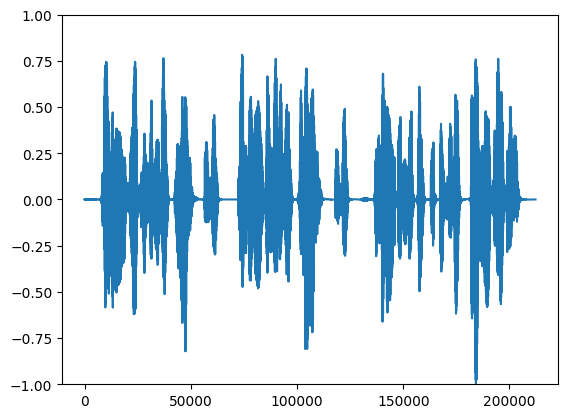

In [9]:
import matplotlib.pyplot as plt
wav_file = '/Storage/speech/tts/kaist-audio-book/wav/남1_동화1/1181.wav'
#wav_file = '/Storage/speech/tts/kaist-audio-book/wav/여1_동화1/1181.wav'
wav, _ = librosa.load(wav_file, sr=16000, res_type='polyphase')
wav = wav / max(abs(wav))

plt.plot(wav)
plt.ylim([-1, 1])
plt.show()

In [10]:
from functools import partial
from data.audio import mel_spectrogram
get_mel = partial(mel_spectrogram, n_fft=2048, num_mels=80, sampling_rate=24000, hop_size=800, win_size=2048, fmin=0, fmax=None, center=False, return_spec=False)
    
def get_blendshape(wav, sid):
    mel = get_mel(torch.Tensor(wav).unsqueeze(0)).to(device)
    sid = torch.Tensor([sid]).long().to(device)
    with torch.no_grad():
        y = model.inference(mel, sid=sid, temperature=0.2)
    y = y[0].data.cpu().numpy()
    return mel[0].data.cpu().numpy(), y
    

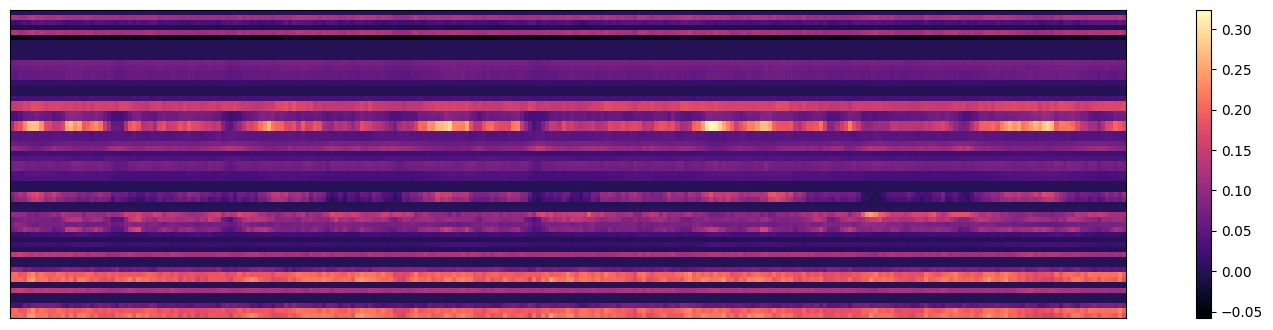

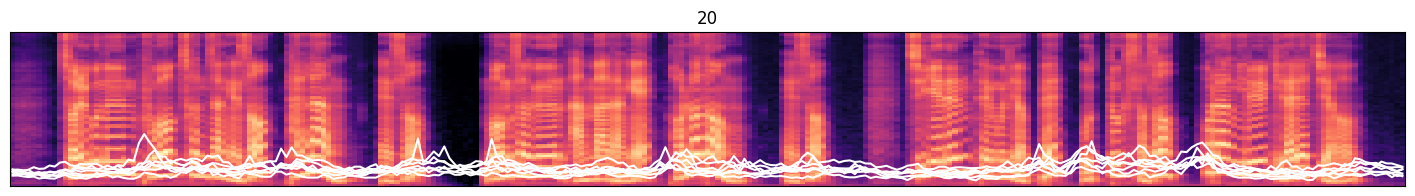

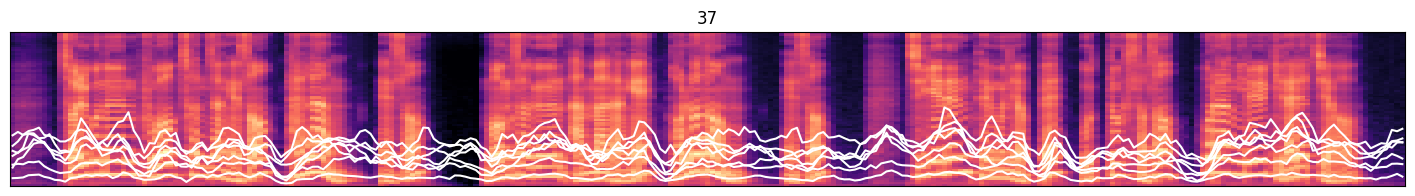

In [11]:
ys = []
for sid in range(1, 8):
    mel, y = get_blendshape(wav, sid)
    ys.append(y)
    
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=[18, 4])
librosa.display.specshow(y, cmap='magma')
plt.colorbar()
plt.show()

for i in [20, 37]:
    plt.figure(figsize=[18, 2])
    plt.title(str(i))
    librosa.display.specshow(mel, cmap='magma')
    for sid in range(len(ys)):
        plt.plot(ys[sid][i] * 80, color='white')
    plt.show()


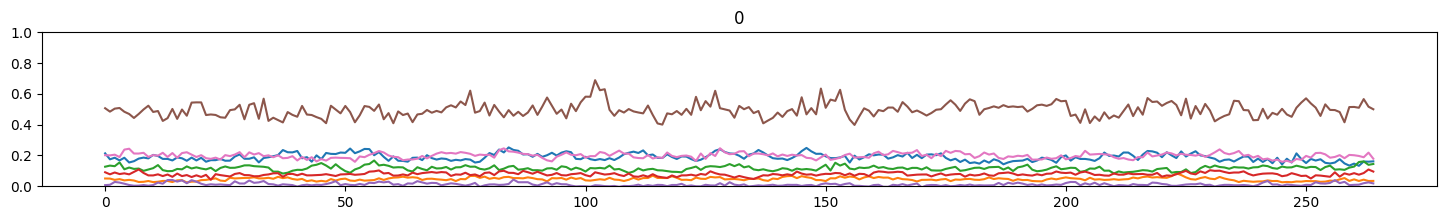

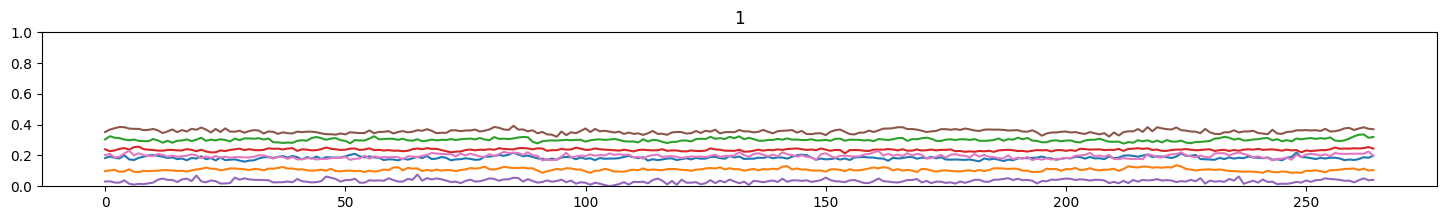

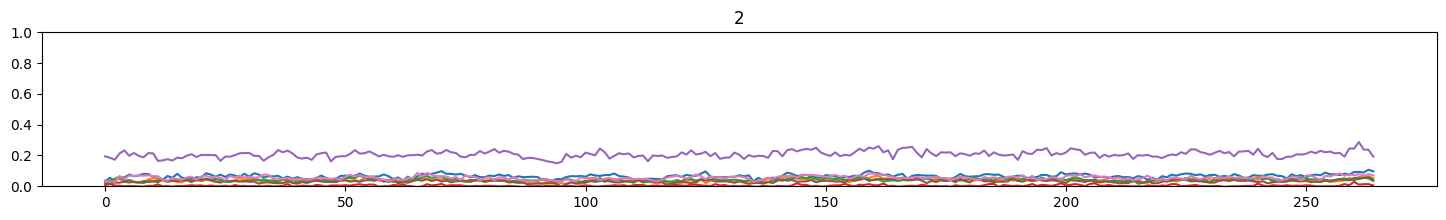

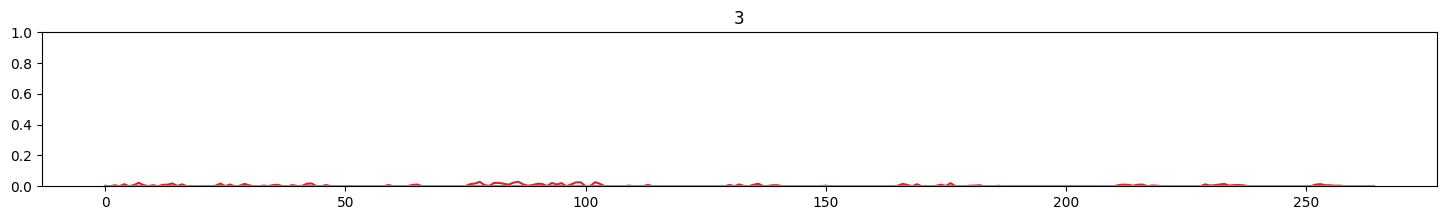

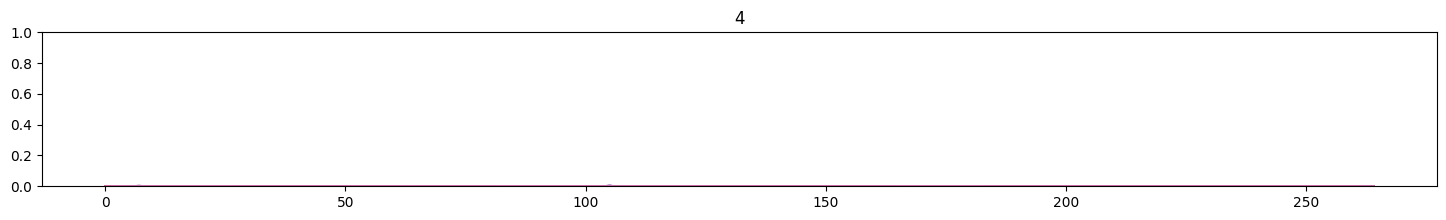

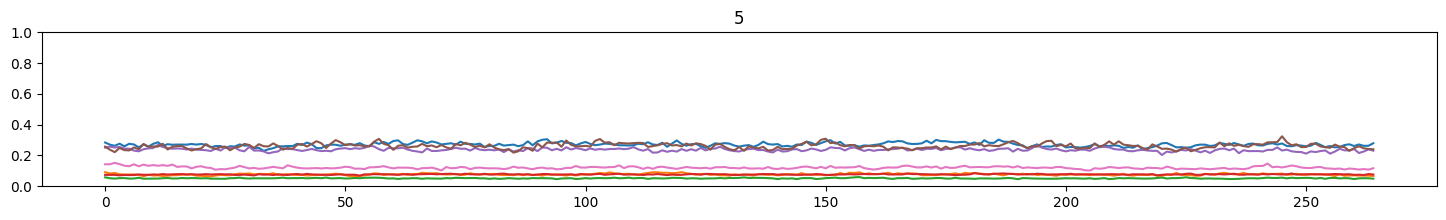

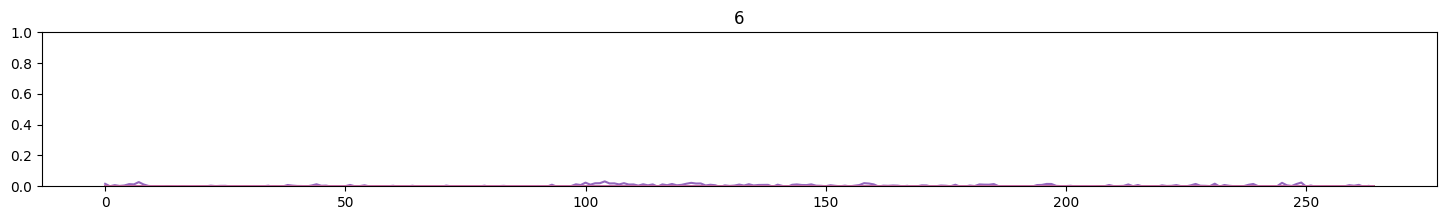

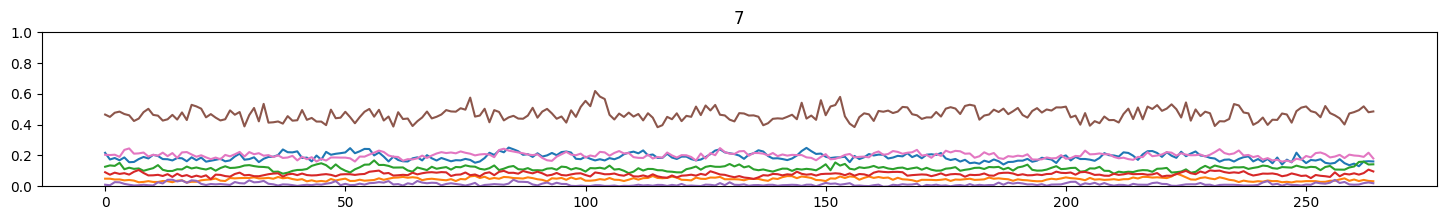

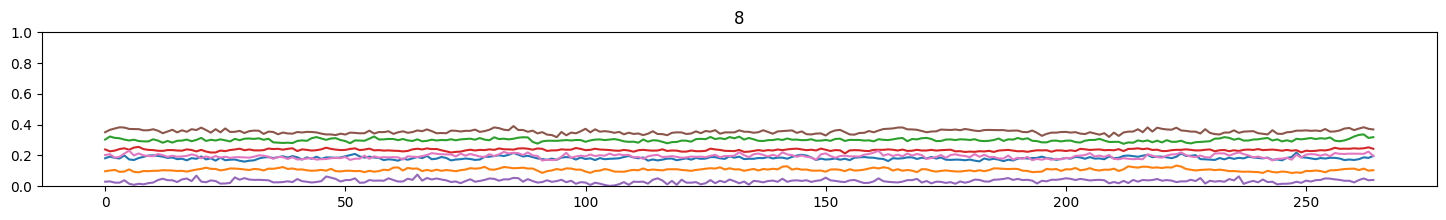

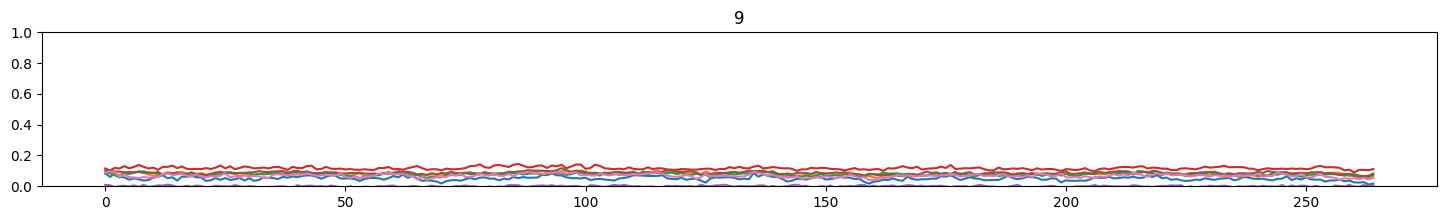

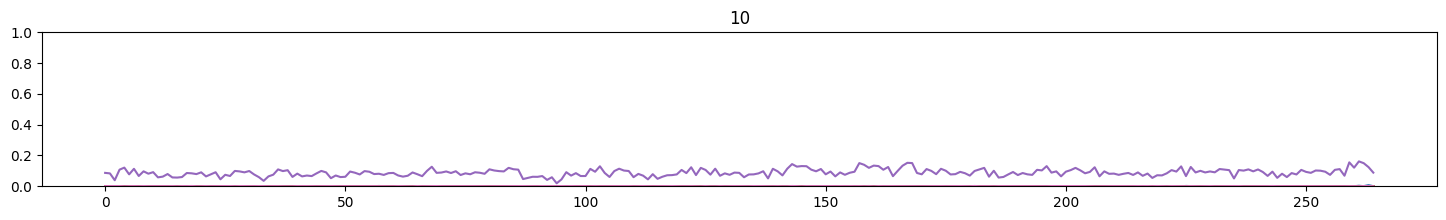

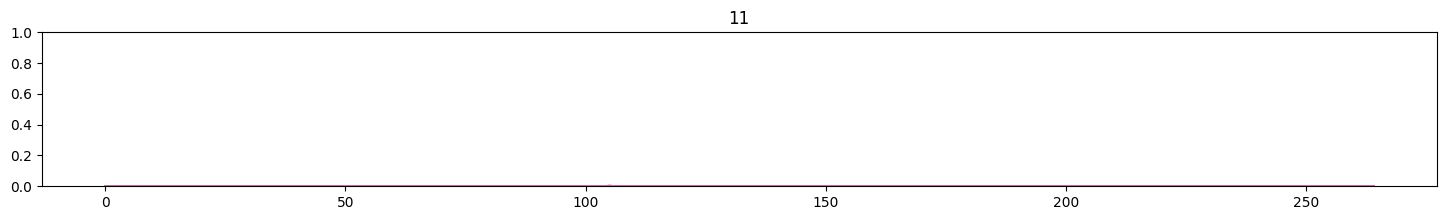

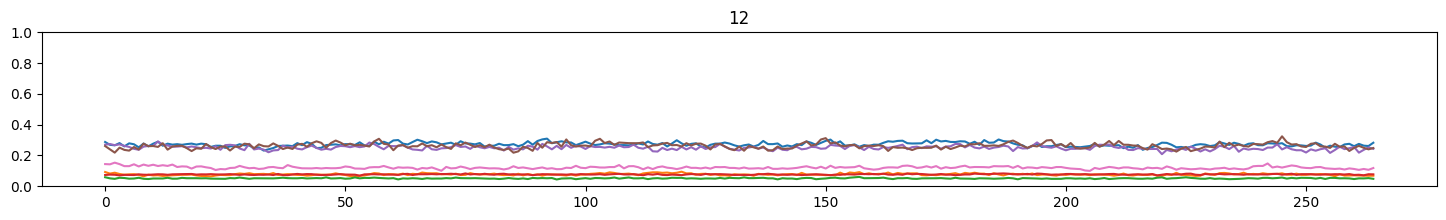

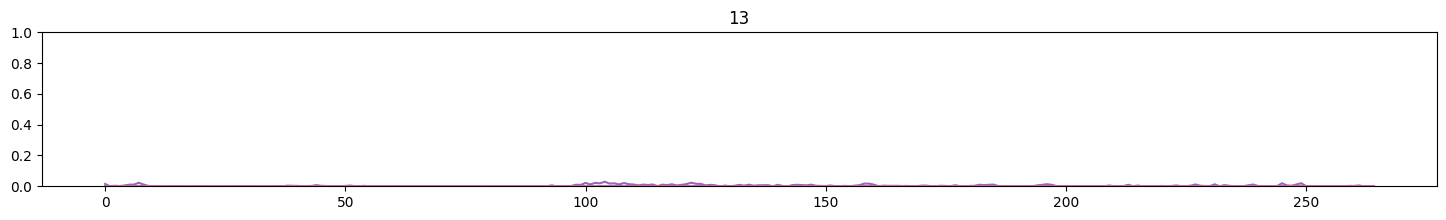

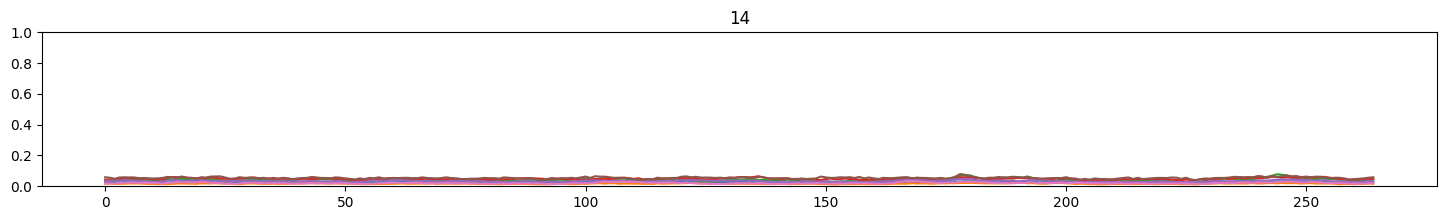

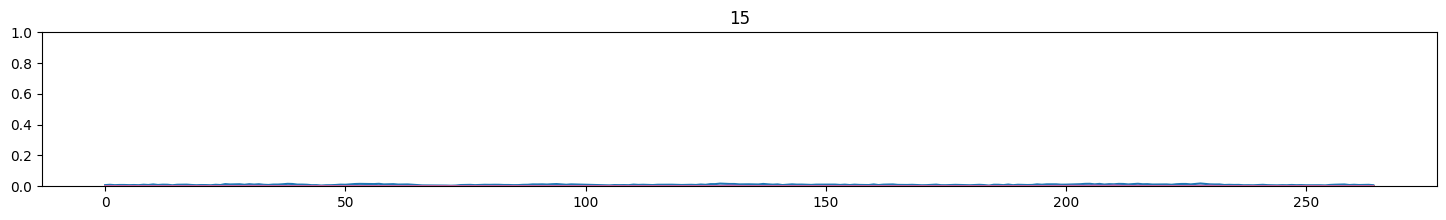

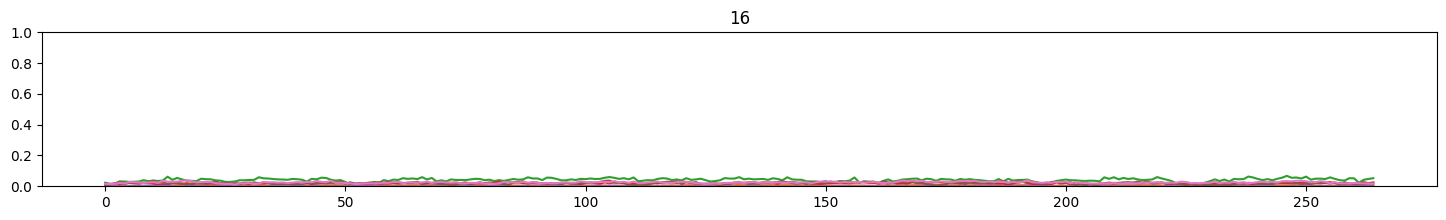

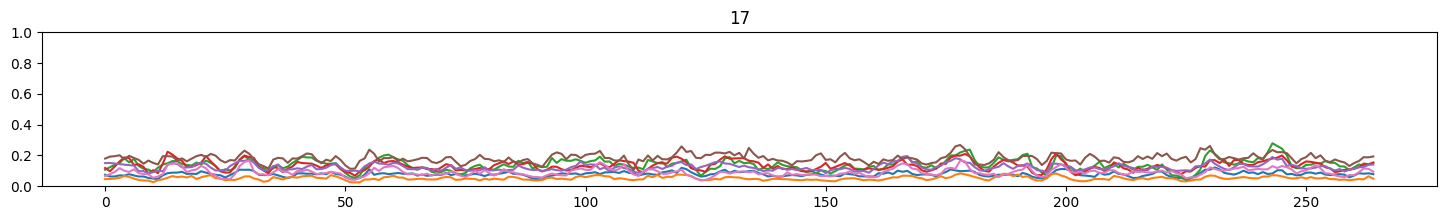

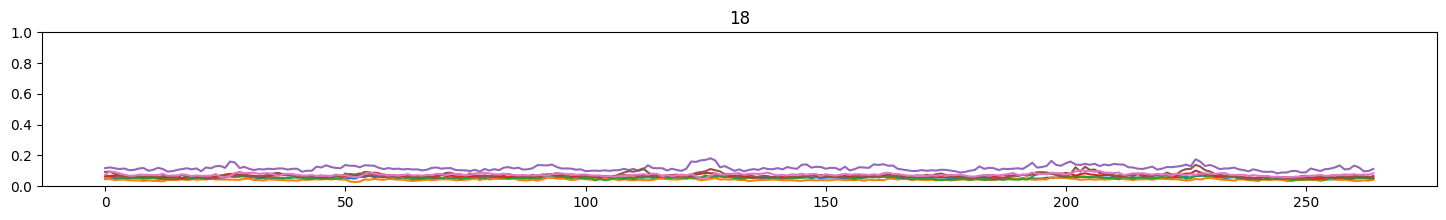

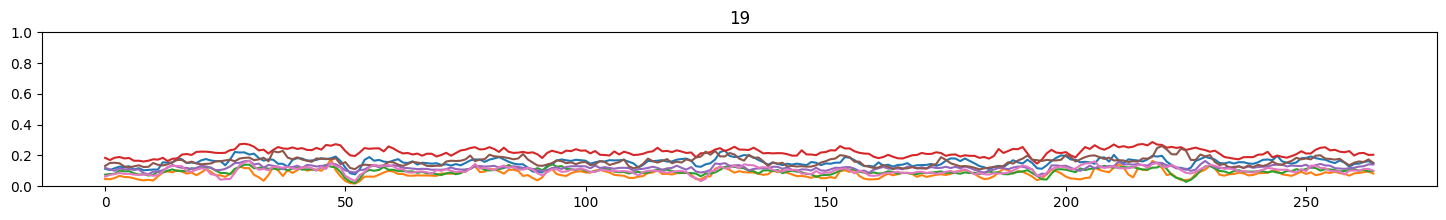

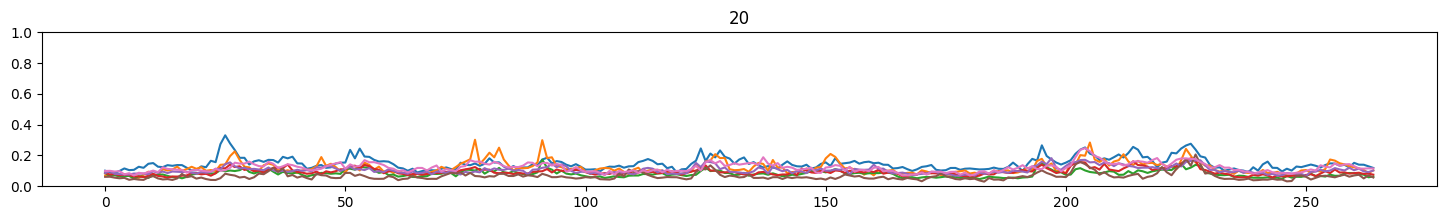

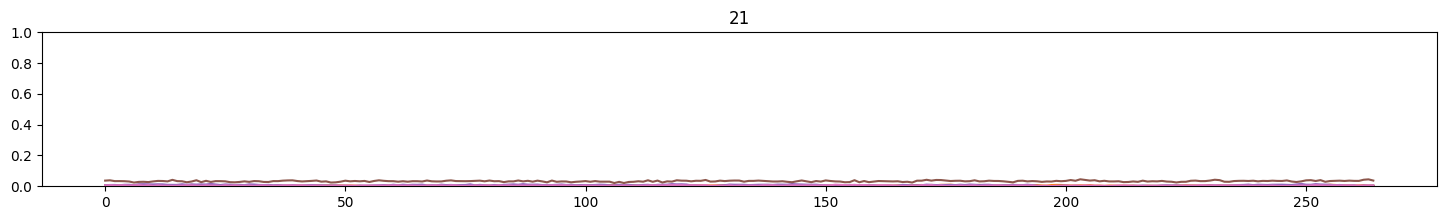

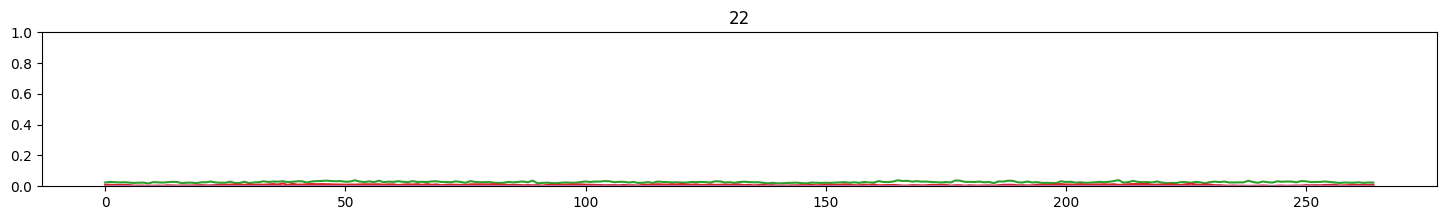

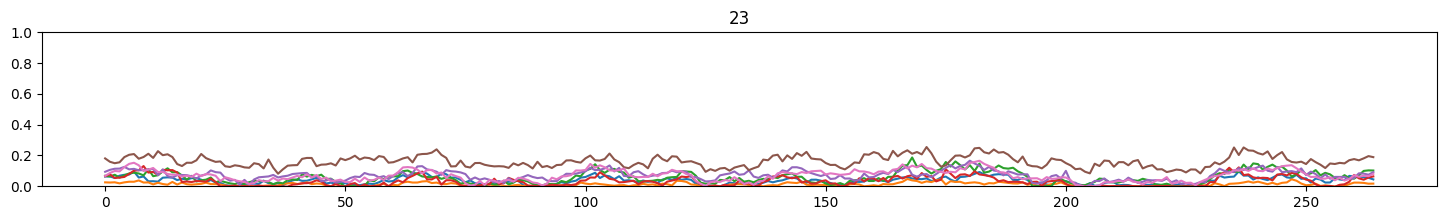

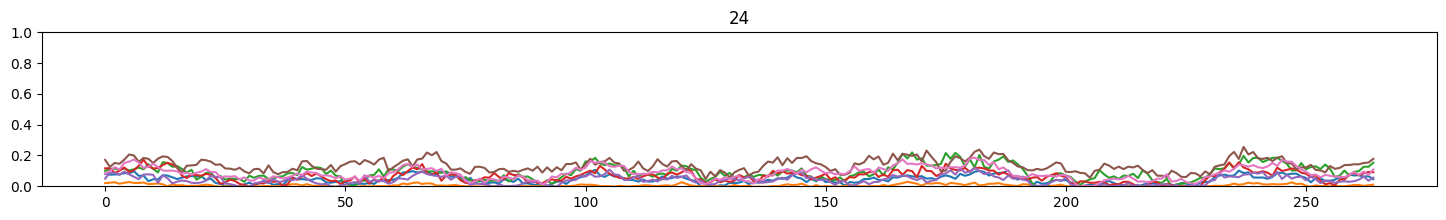

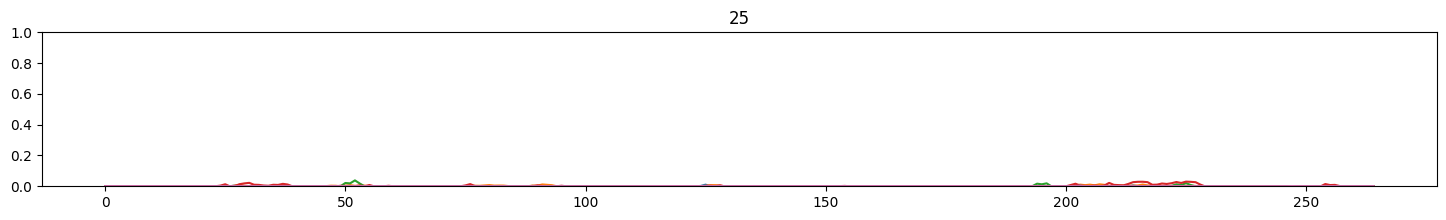

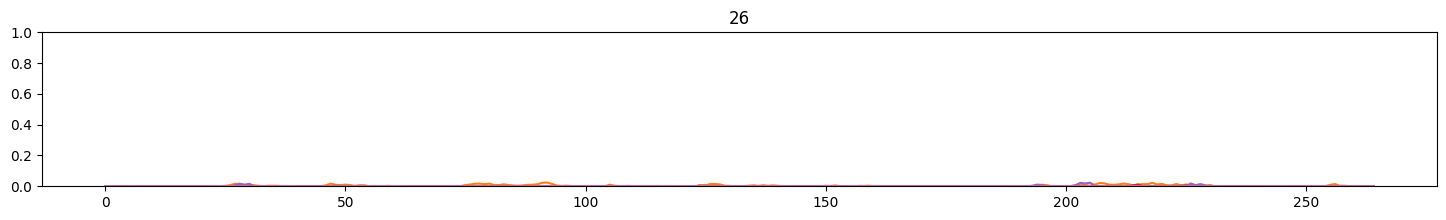

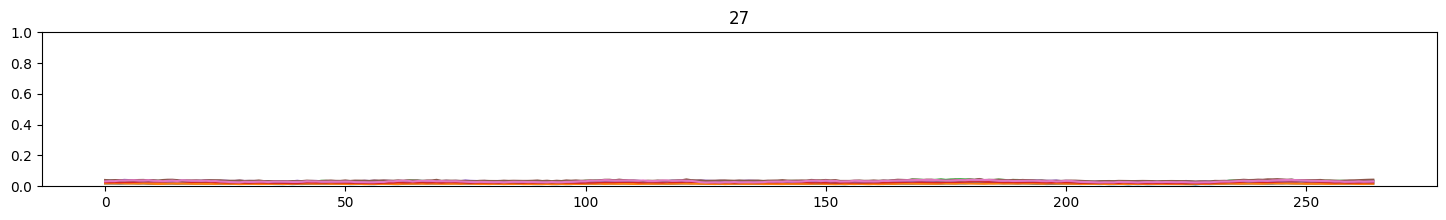

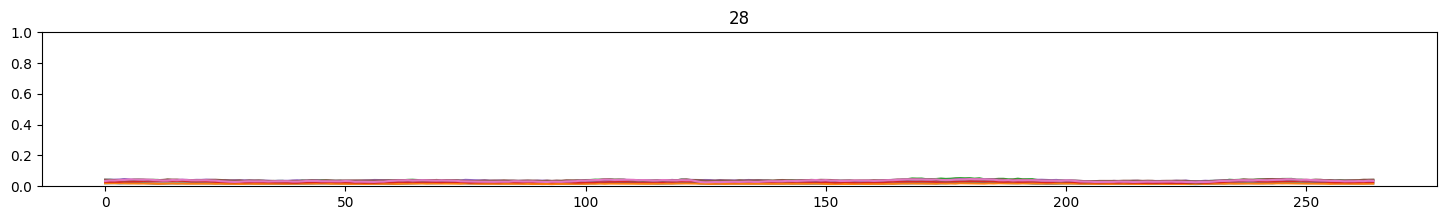

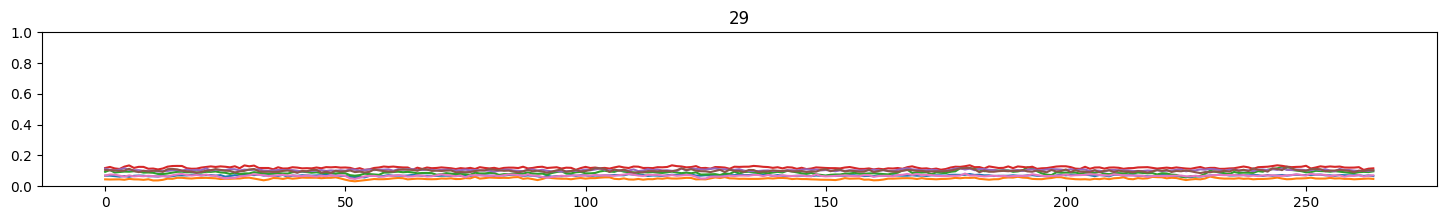

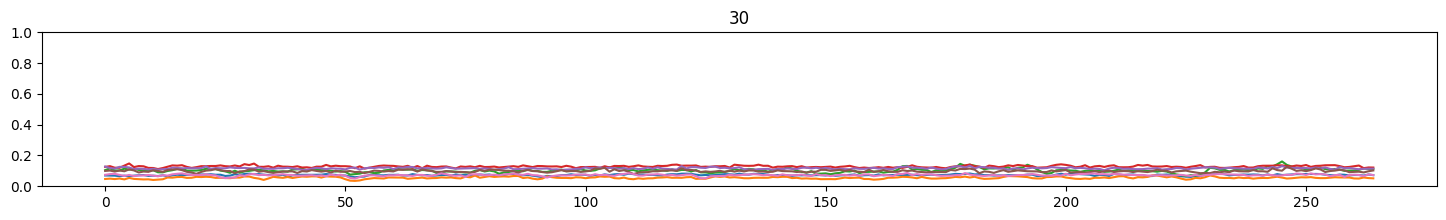

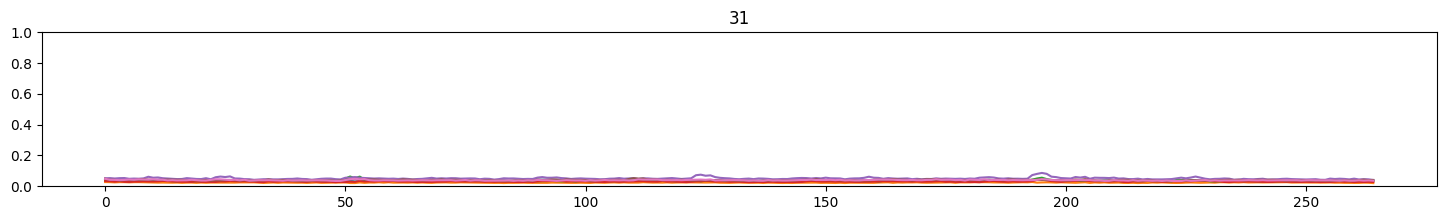

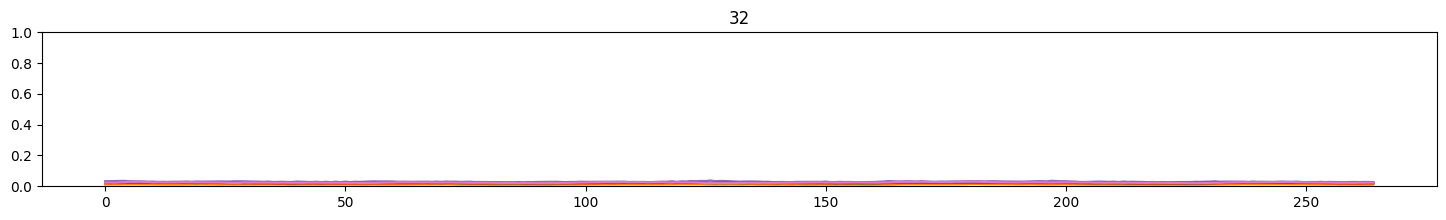

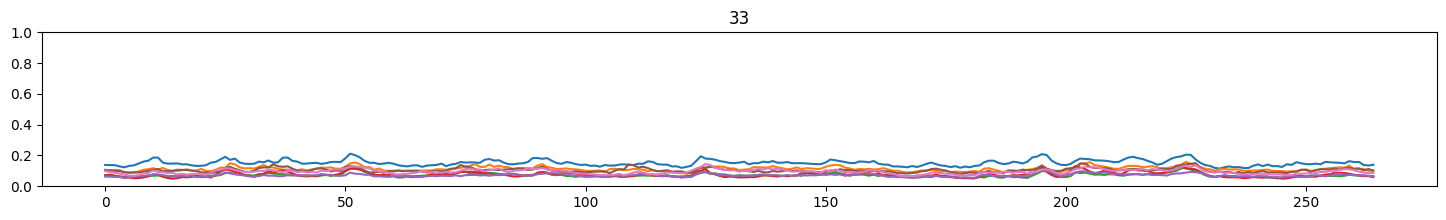

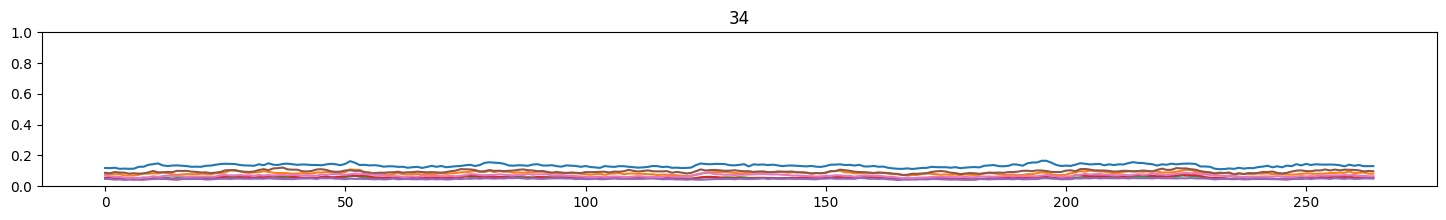

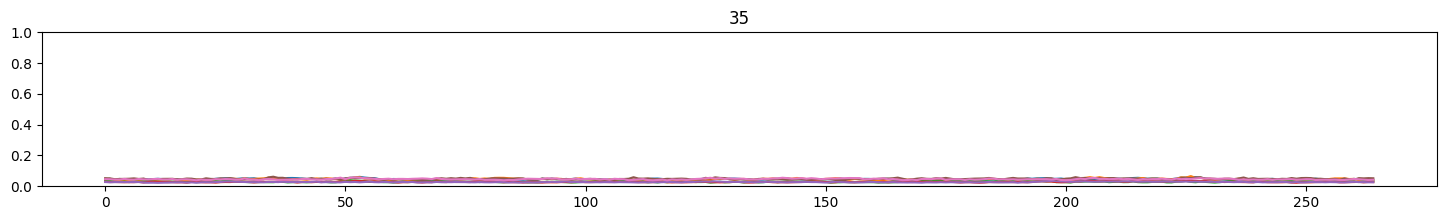

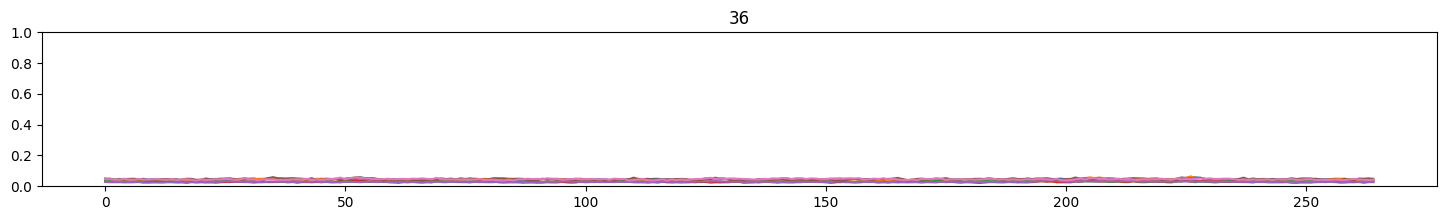

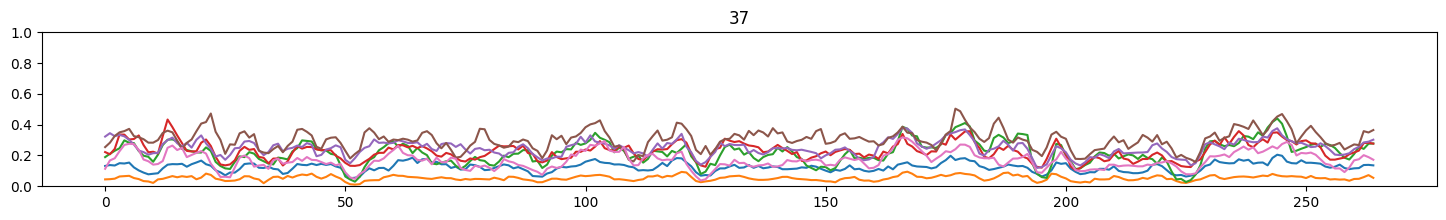

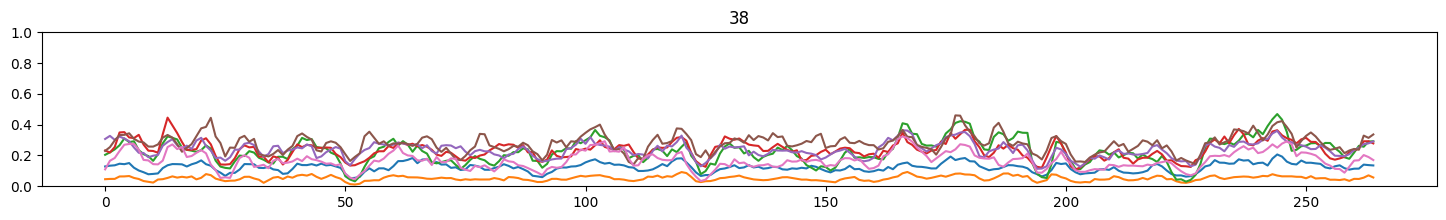

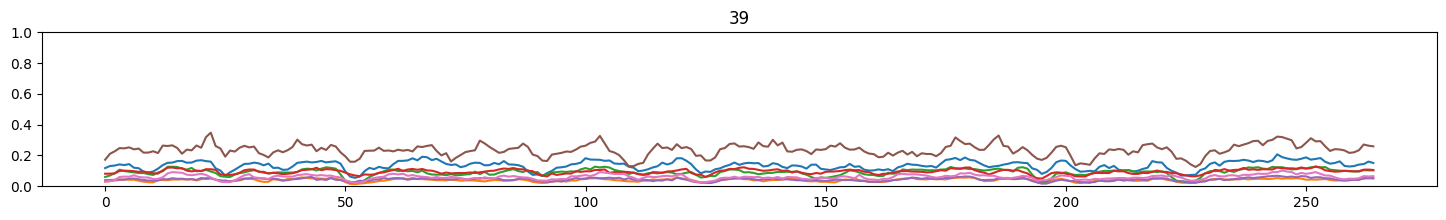

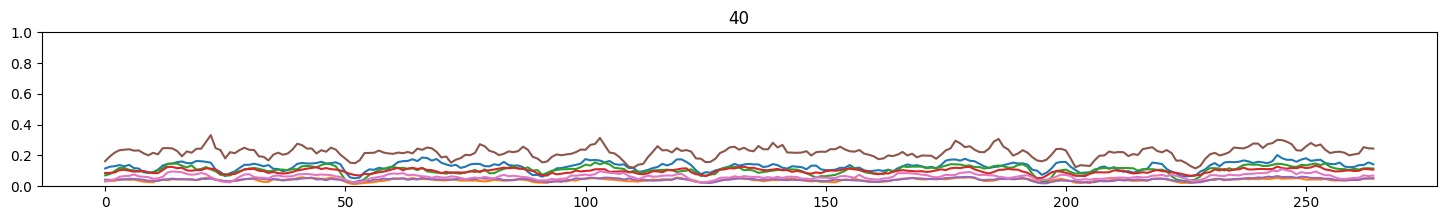

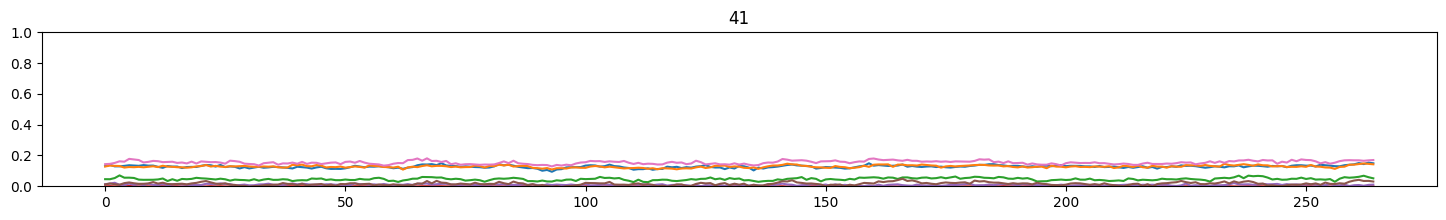

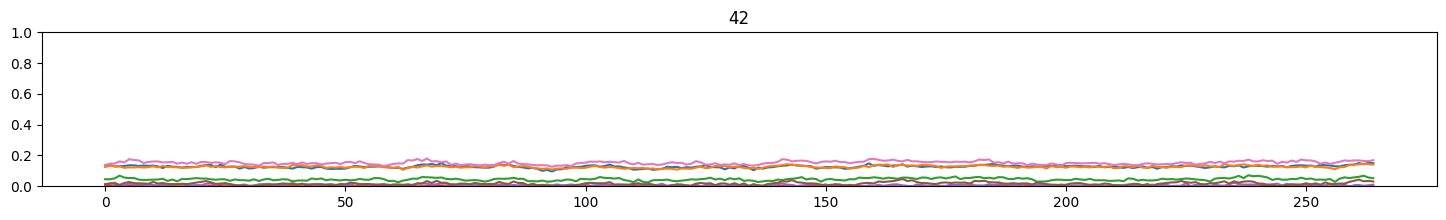

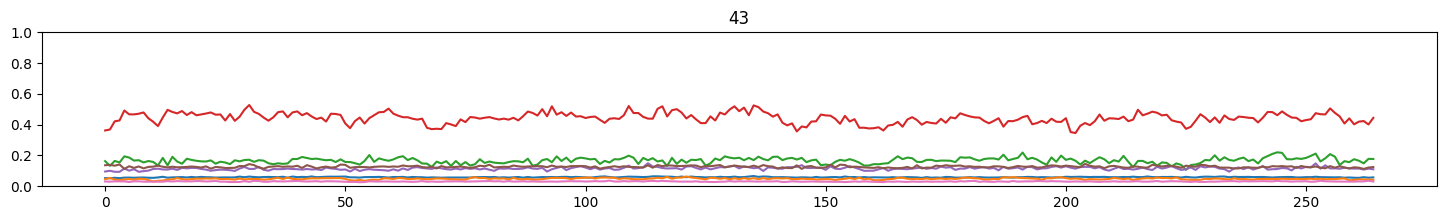

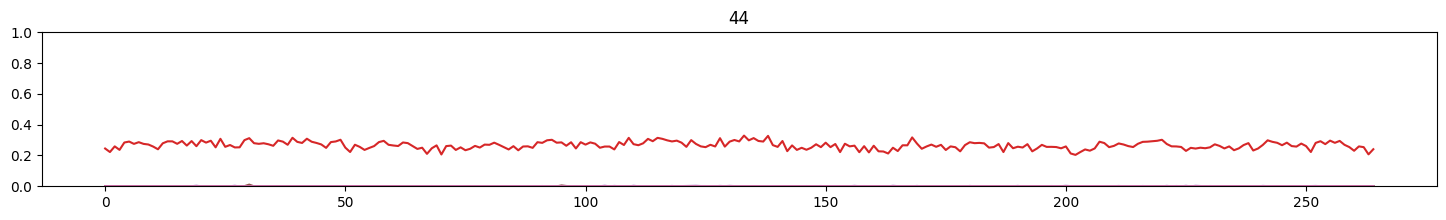

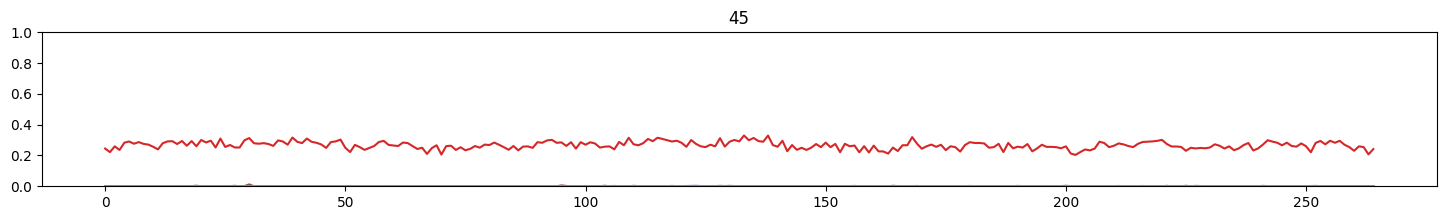

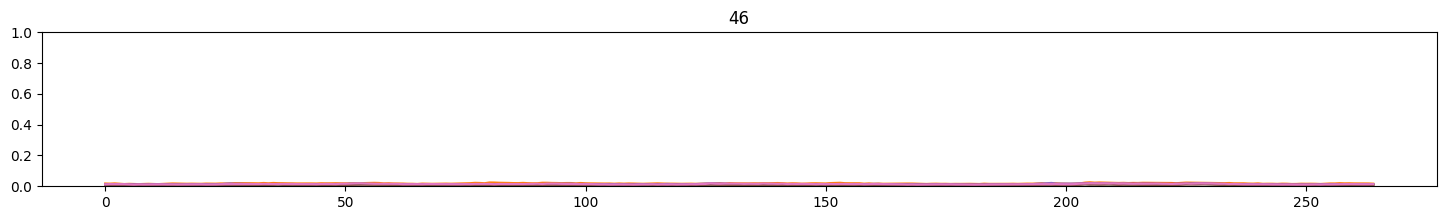

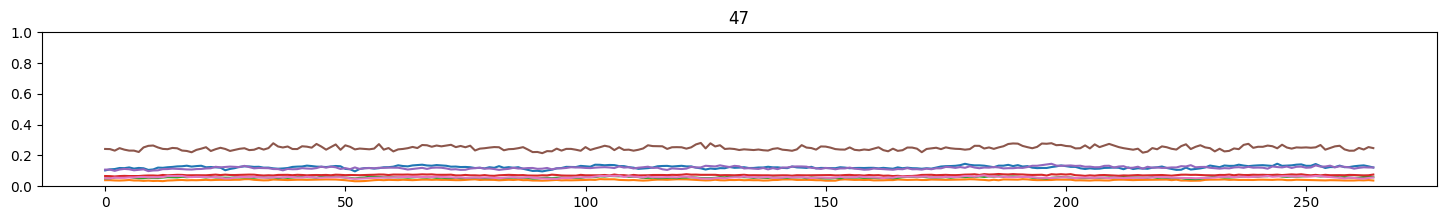

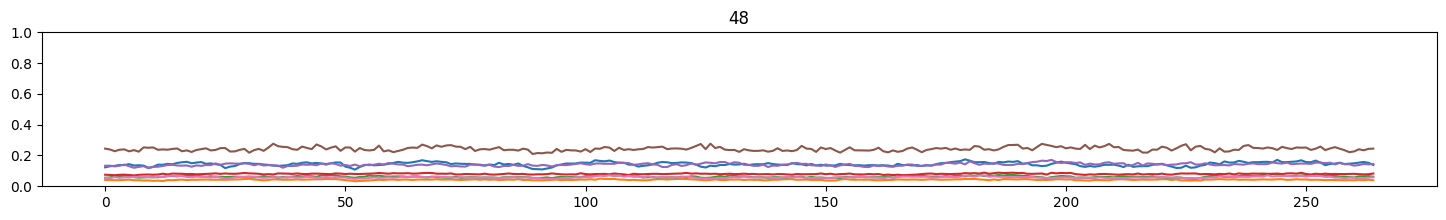

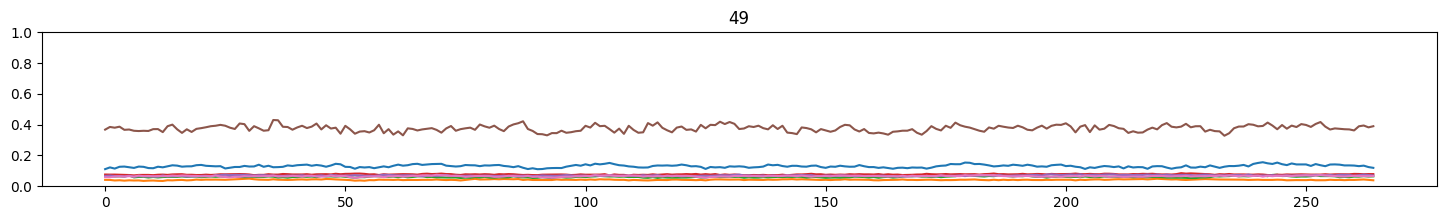

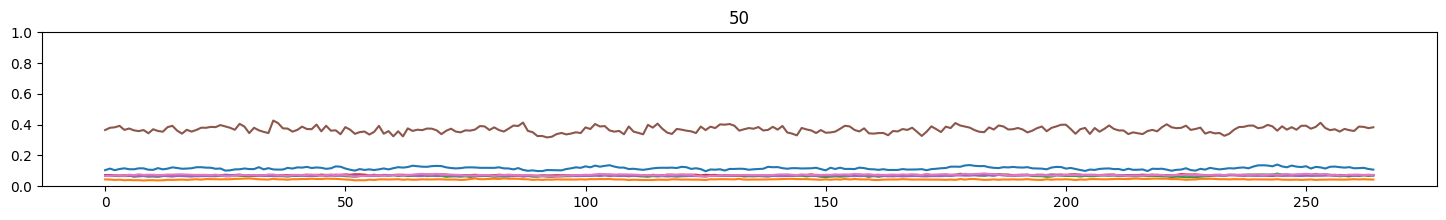

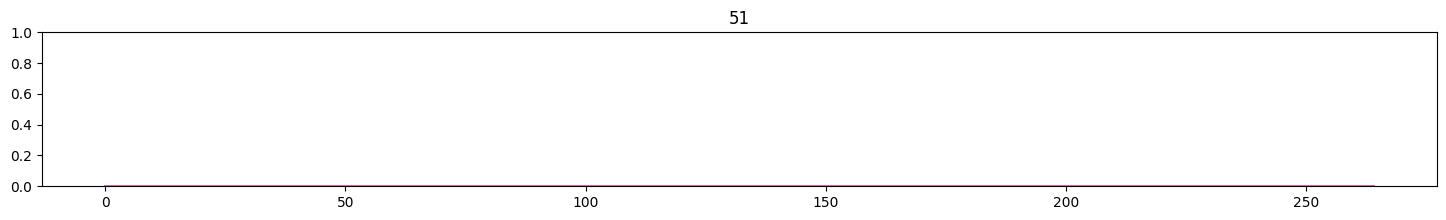

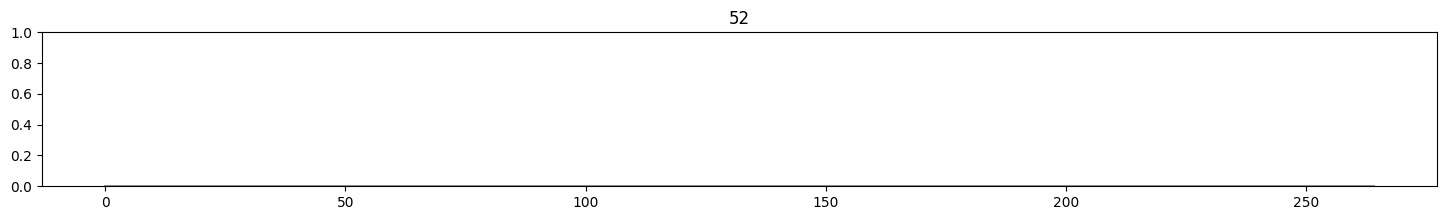

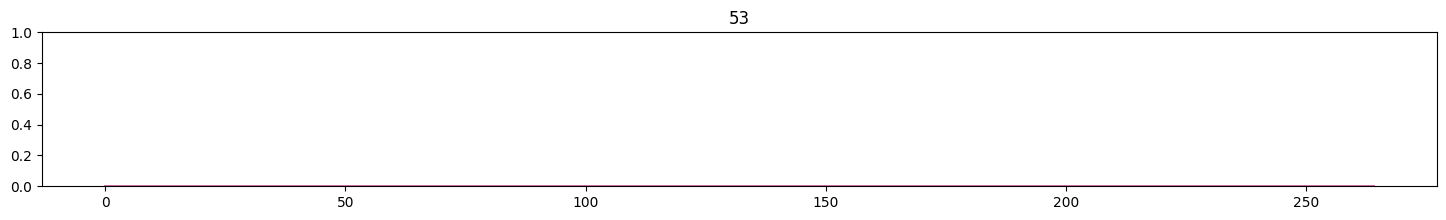

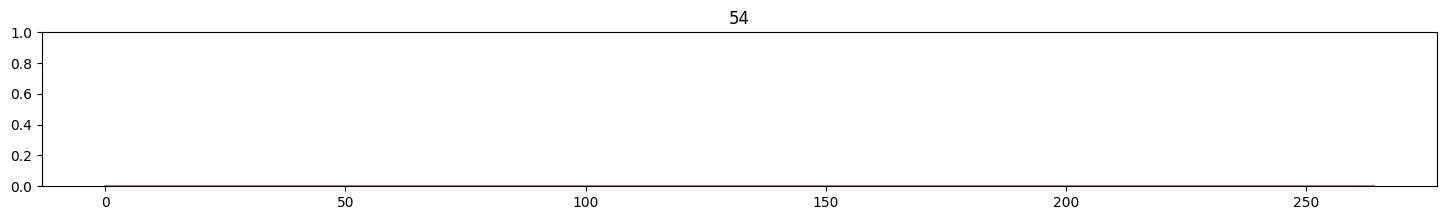

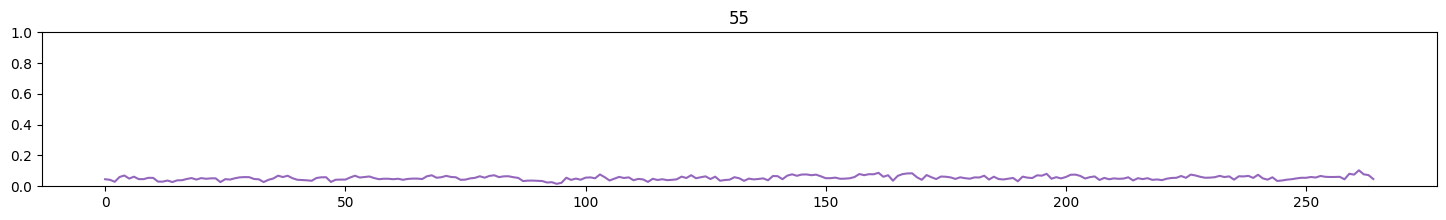

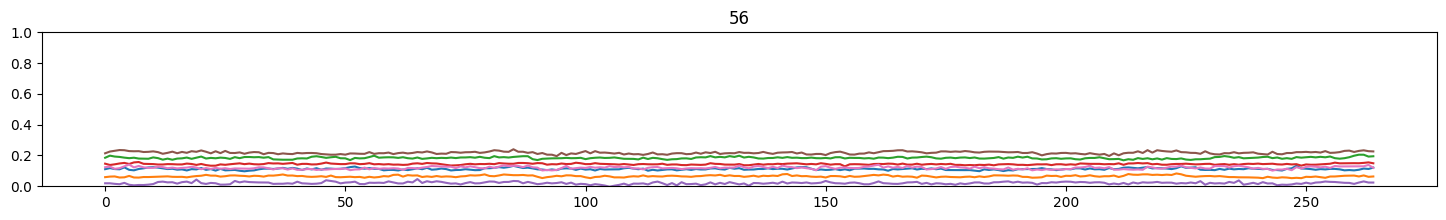

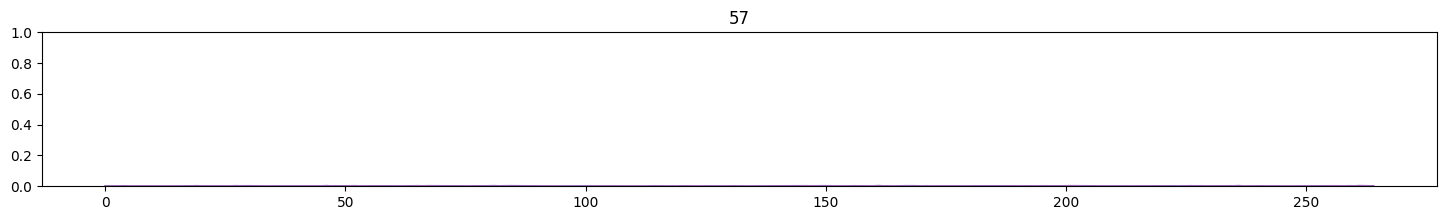

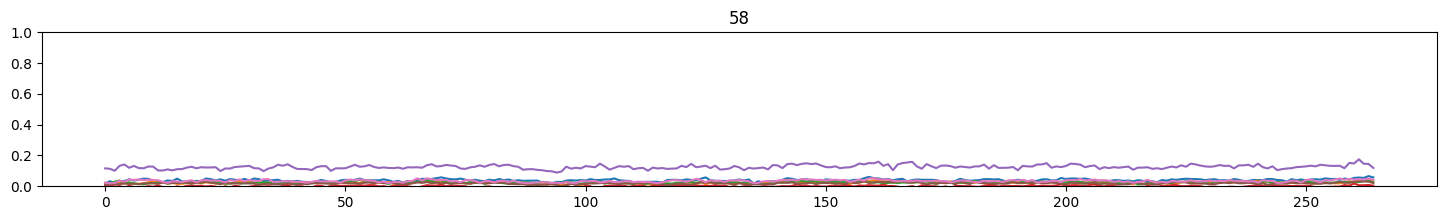

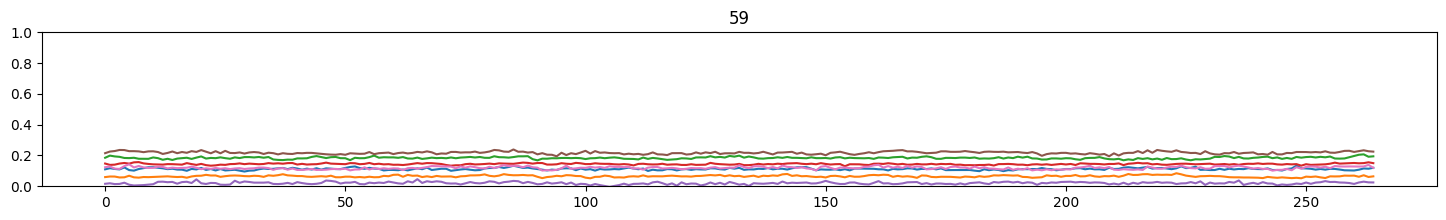

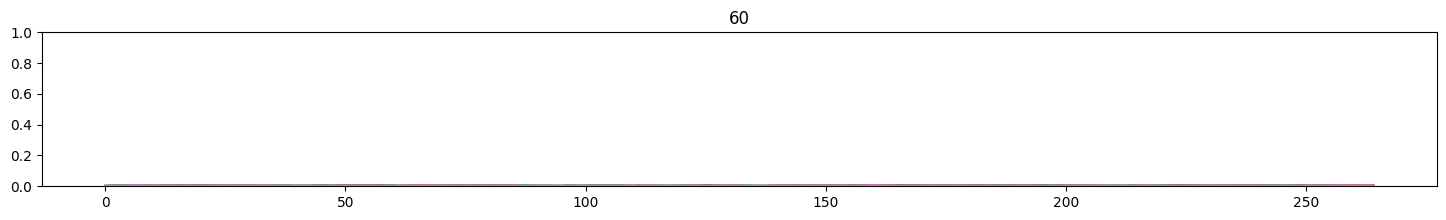

In [12]:
for i in range(0, 61):
    plt.figure(figsize=[18, 2])
    plt.title(str(i))
    for sid in range(len(ys)):
        plt.plot(ys[sid][i])
        plt.ylim([0, 1])
    plt.show()
